In [47]:
N = 100000
totient = [0] * (N+1)
sigma = [0] * (N+1)

with open("data.csv") as h:
    for line in h.read().split("\n"):
        a, b, c = map(int, line.split(" "))
        totient[a] = b
        sigma[a] = c
        if a == N: break

In [48]:
import math
c = 6 / math.pi**2

import numpy as np
import matplotlib.pyplot as plt

prod = np.array([totient[i]*sigma[i] for i in range(N+1)])
lb = np.array([i**2*c for i in range(N+1)])
ub = np.array([i**2 for i in range(N+1)])

plt.figure(figsize=(10, 8), dpi=300)

#plt.plot(lb, color='tab:orange')
#plt.plot(ub, color='tab:orange')
plt.plot(prod, ',', color='tab:blue')
plt.show()


In [49]:
from collections import Counter

pfactorize = [Counter() for _ in range(N + 1)]

def init_pfactorize():
    for i in range(2, N + 1):
        if pfactorize[i]:
            continue
        
        pow_i = i
        while pow_i <= N:
            for j in range(pow_i, N + 1, pow_i):
                pfactorize[j][i] += 1
            if pow_i > N // i:
                break
            pow_i *= i

init_pfactorize()

In [50]:
def ok2(n, p):
    return len(list(pfactorize[n])) == 2 and pfactorize[n][p]==1

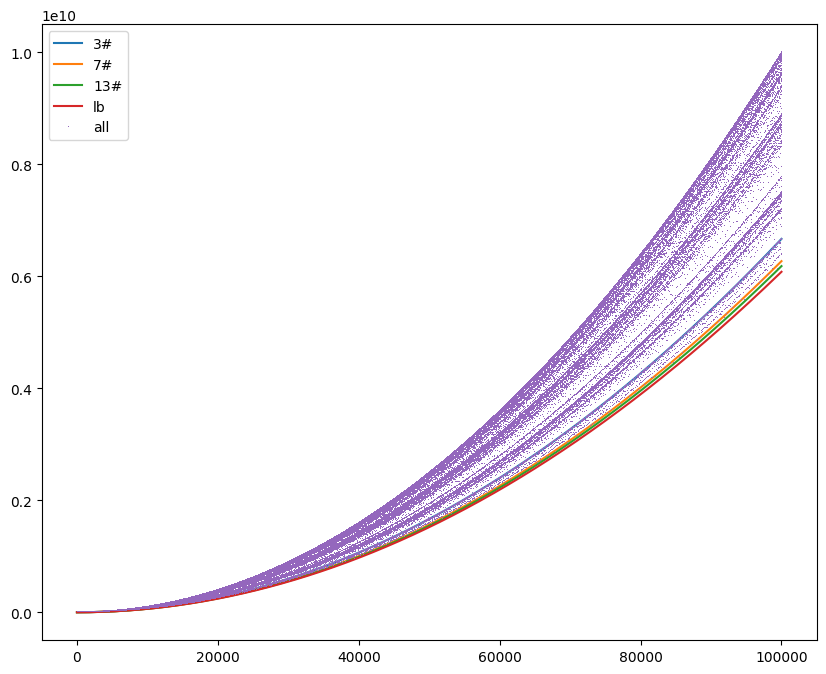

In [ ]:
prod = np.array([totient[i]*sigma[i] for i in range(N+1)])

plt.figure(figsize=(10, 8), dpi=100)

#plt.plot(x2, y2, '.', label='2p^α')
#plt.plot(x3, y3, '.', label='3p^α')
#plt.plot(x5, y5, '.', label='5p^α')

#THE POINTS AP^alpha WHERE A IS CONSTANT PRODUCES THE CURVE PHI(A)SIGMA(A)/A^2 X^2


xtest = np.arange(1, N, 1)

#plt.plot(xtest, prod[2]/2**2 *xtest**2, label='2#')
#plt.plot(xtest, prod[6]/6**2 *xtest**2, label='3#')
#plt.plot(xtest, prod[30]/30**2 *xtest**2, label='5#')
#plt.plot(xtest, prod[210]/210**2 *xtest**2, label='7#')
#plt.plot(xtest, prod[2310]/2310**2 *xtest**2, label='11#')
plt.plot(xtest, prod[30030]/30030**2 *xtest**2, label='13#')

#THE BOUND IS ARBITRARILY GOOD. THE LINE AT A=P# WHEN P APPROACHES INFINITY.

plt.plot(xtest, c*xtest**2, label='lb')


plt.plot(prod, ',', label='all')

plt.legend()
plt.show()


rtprod = np.array([(totient[i]*sigma[i])**0.5 for i in range(N+1)])
rtlb = np.array([i*rtc for i in range(N+1)])
rtub = np.array([i for i in range(N+1)])

plt.figure(figsize=(12, 8))


plt.plot(rtlb)
plt.plot(rtub)
plt.plot(rtprod, ',')
plt.show()